<a href="https://colab.research.google.com/github/negreiroleo/AnaliseExploratoria/blob/main/AnaliseDeMercado/Sprint3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise exploratória com Python**

# **Analisando índices e ações**

*O objetivo dessa análise é mostrar que investimento certo não existe, existe apenas oportunidade e oportunismo no mercado financeiro*

In [ ]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [ ]:
yahoo_financials = YahooFinancials('NQ=F')
data = yahoo_financials.get_historical_price_data(
    start_date='2020-03-01', end_date='2023-01-01', time_interval='weekly')

***O índice utilizado aqui é o Nasdaq 100, O Nasdaq 100 é um índice composto pelas 100 maiores empresas não financeiras negociadas na bolsa de valores Nasdaq. As empresas listadas na Nasdaq com maior representação são as chamadas big techs, empresas com foco no desenvolvimento tecnológico que abocanham grande parte de seus respectivos mercados.***

In [ ]:
NQ_F = pd.DataFrame(data['NQ=F']['prices'])
NQ_F = NQ_F.drop('date', axis=1).set_index('formatted_date')

In [ ]:
NQ_F.head(148)

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2020-03-02,9002.50,8224.25,8349.25,8503.250000,5659420,8503.250000
2020-03-09,8378.75,6942.50,8369.00,7915.750000,3993784,7915.750000
2020-03-16,7905.25,6830.00,7903.00,7417.979980,1459287,7417.979980
2020-03-23,7893.50,6628.75,6798.00,7568.500000,2857514,7568.500000
2020-03-30,7995.00,7365.00,7395.75,7522.750000,2044029,7522.750000
...,...,...,...,...,...,...
2022-11-28,12145.00,11465.00,11731.25,12010.250000,3048783,12010.250000
2022-12-05,12015.75,11422.50,12000.50,11569.750000,2934764,11569.750000
2022-12-12,12229.50,11206.50,11553.00,11327.040039,1807984,11327.040039


In [ ]:
NQ_F.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 2020-03-02 to 2022-12-26
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   high      148 non-null    float64
 1   low       148 non-null    float64
 2   open      148 non-null    float64
 3   close     148 non-null    float64
 4   volume    148 non-null    int64  
 5   adjclose  148 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 8.1+ KB


In [ ]:
import matplotlib.pyplot as plt  
import seaborn as sns

*Logo abaixo temos um gráfico de dispersão que utiliza a data como eixo **X** e a alta da semana como eixo **Y**.*

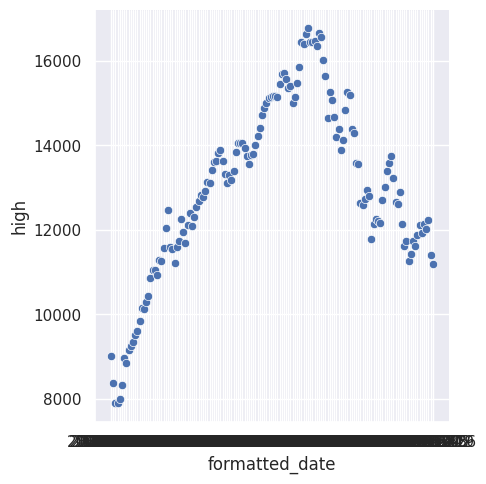

In [ ]:
sns.relplot(data=NQ_F, x='formatted_date', y="high")

*Agora vamos analisar o gráfico de linha abaixo que segue as regras de eixo X e Y do gráfico acima:
Podemos tirar algumas conclusões apenas olhando este gráfico.
A primeira, temos um crescimento no valor de mercado assombroso a partir de março de 2020 até novembro de 2021.
a segunda é que, a partir do final de 2021 até o começo de 2023 temos oscilações em quedas significativas(aproximadamente 1/3 do valor).*

<Axes: xlabel='formatted_date', ylabel='high'>

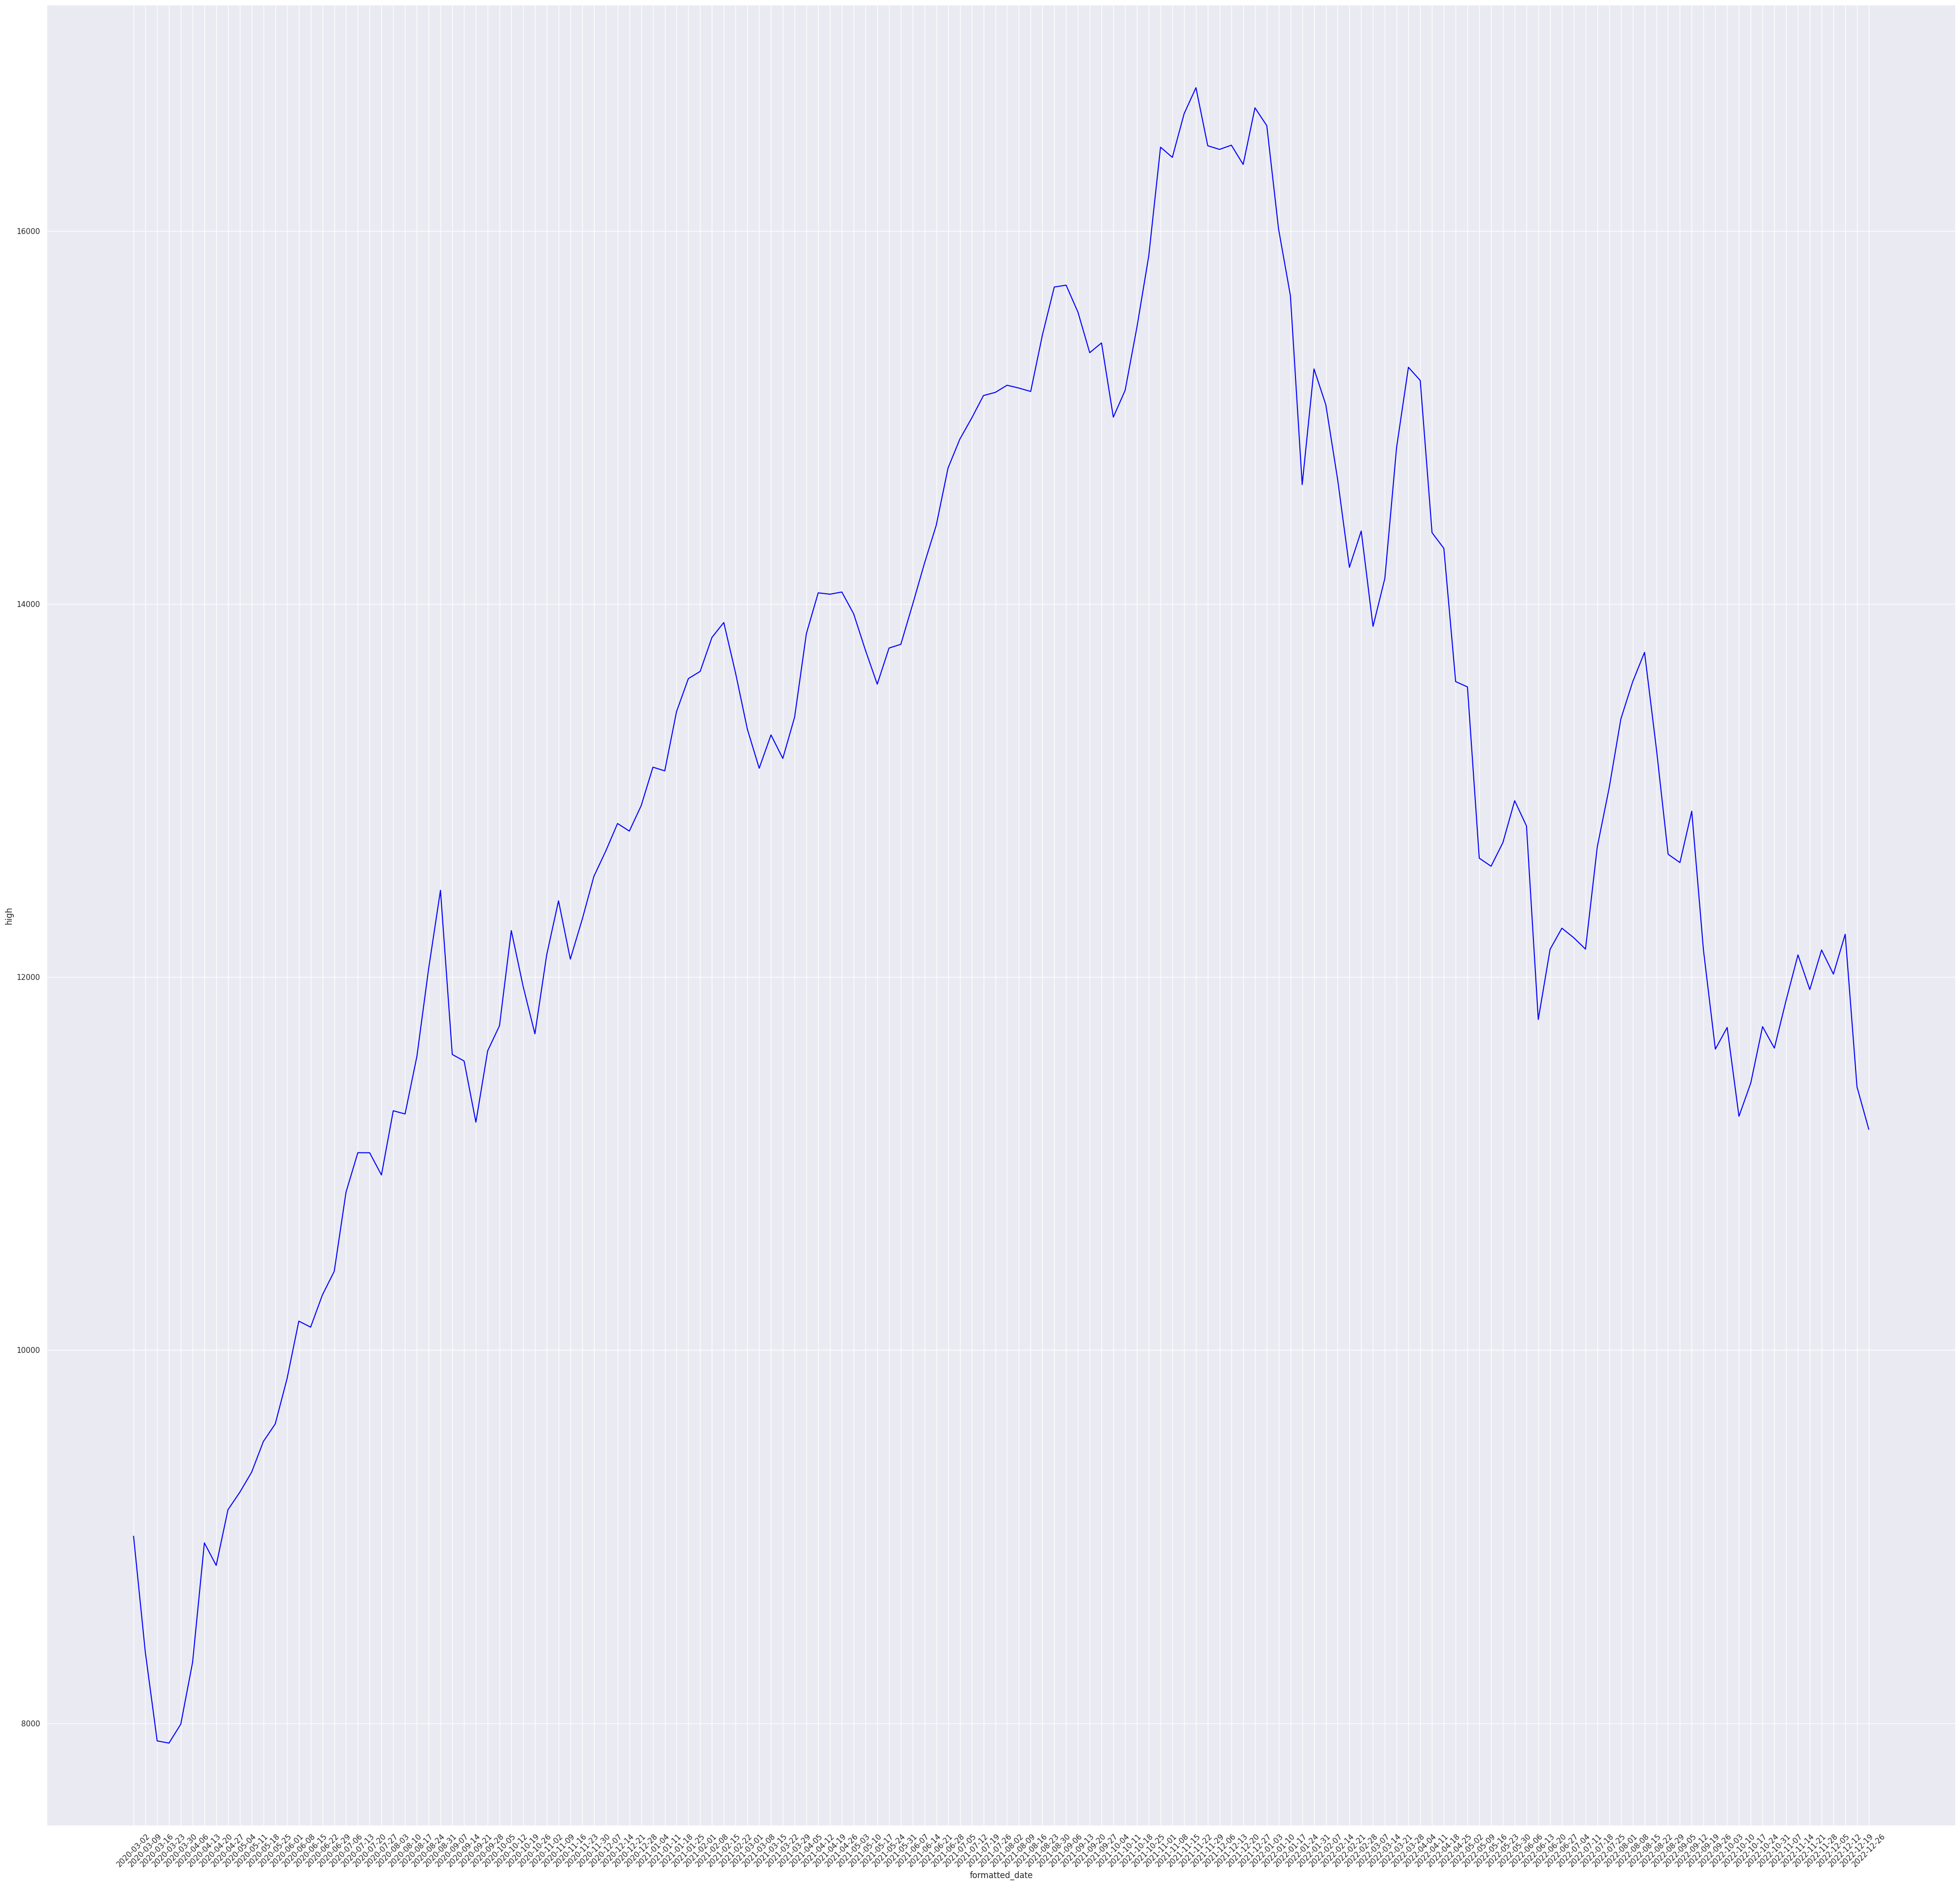

In [ ]:
plt.figure(figsize=(50,48))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.lineplot(data=NQ_F, x='formatted_date', y='high', color='blue')

***Com esses dois pontos podemos sugerir mais uma coisa, o período da pandemia supervalorizou o valor das empresas de tecnologia, streamings, serviços de entrega por delivery e transporte pelo fato de terem ocorridos diversos lockdowns e a implementação de trabalho remoto em todo mundo. Mas com o fim da pandemia da Covid-19 o mercado despencou.***

Para dar mais força ao argumento apresentado vamos analisar ações de empresas levando em conta o mesmo período como exemplo:

In [ ]:
yahoo_financials = YahooFinancials('AMZN')
data = yahoo_financials.get_historical_price_data(
    start_date='2020-03-01', end_date='2023-01-01', time_interval='weekly')

In [ ]:
AMZN = pd.DataFrame(data['AMZN']['prices'])
AMZN = AMZN.drop('date', axis=1).set_index('formatted_date')

***Vamos analisar o histórico de ações da Amazon, uma das maiores bigtechs no mundo.***

In [ ]:
AMZN.head(148)

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2020-03-02,99.816498,93.474998,95.324501,95.054497,581818000,95.054497
2020-03-09,94.713501,83.750000,88.693001,89.250000,814544000,89.250000
2020-03-16,97.849998,81.301498,82.075500,92.304497,993948000,92.304497
2020-03-23,97.824501,90.599998,91.387497,95.004997,660878000,95.004997
2020-03-30,99.651001,94.457497,96.141502,95.329498,466350000,95.329498
...,...,...,...,...,...,...
2022-11-28,97.230003,91.440002,93.930000,94.129997,384300600,94.129997
2022-12-05,94.059998,87.480003,93.050003,89.089996,355830400,89.089996
2022-12-12,96.250000,86.730003,89.209999,87.860001,463456800,87.860001


In [ ]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 2020-03-02 to 2022-12-26
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   high      148 non-null    float64
 1   low       148 non-null    float64
 2   open      148 non-null    float64
 3   close     148 non-null    float64
 4   volume    148 non-null    int64  
 5   adjclose  148 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 12.2+ KB


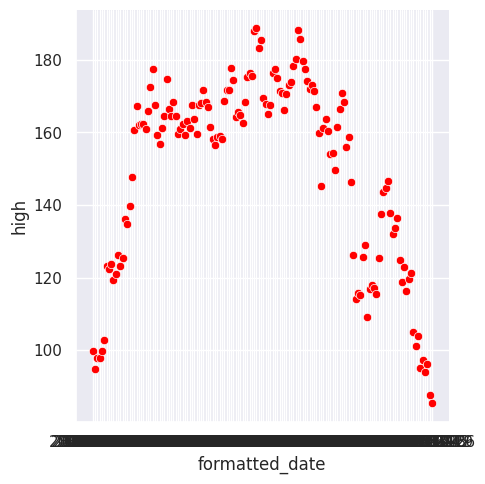

In [ ]:
sns.relplot(data=AMZN, x='formatted_date', y="high", color='red')

<Axes: xlabel='formatted_date', ylabel='high'>

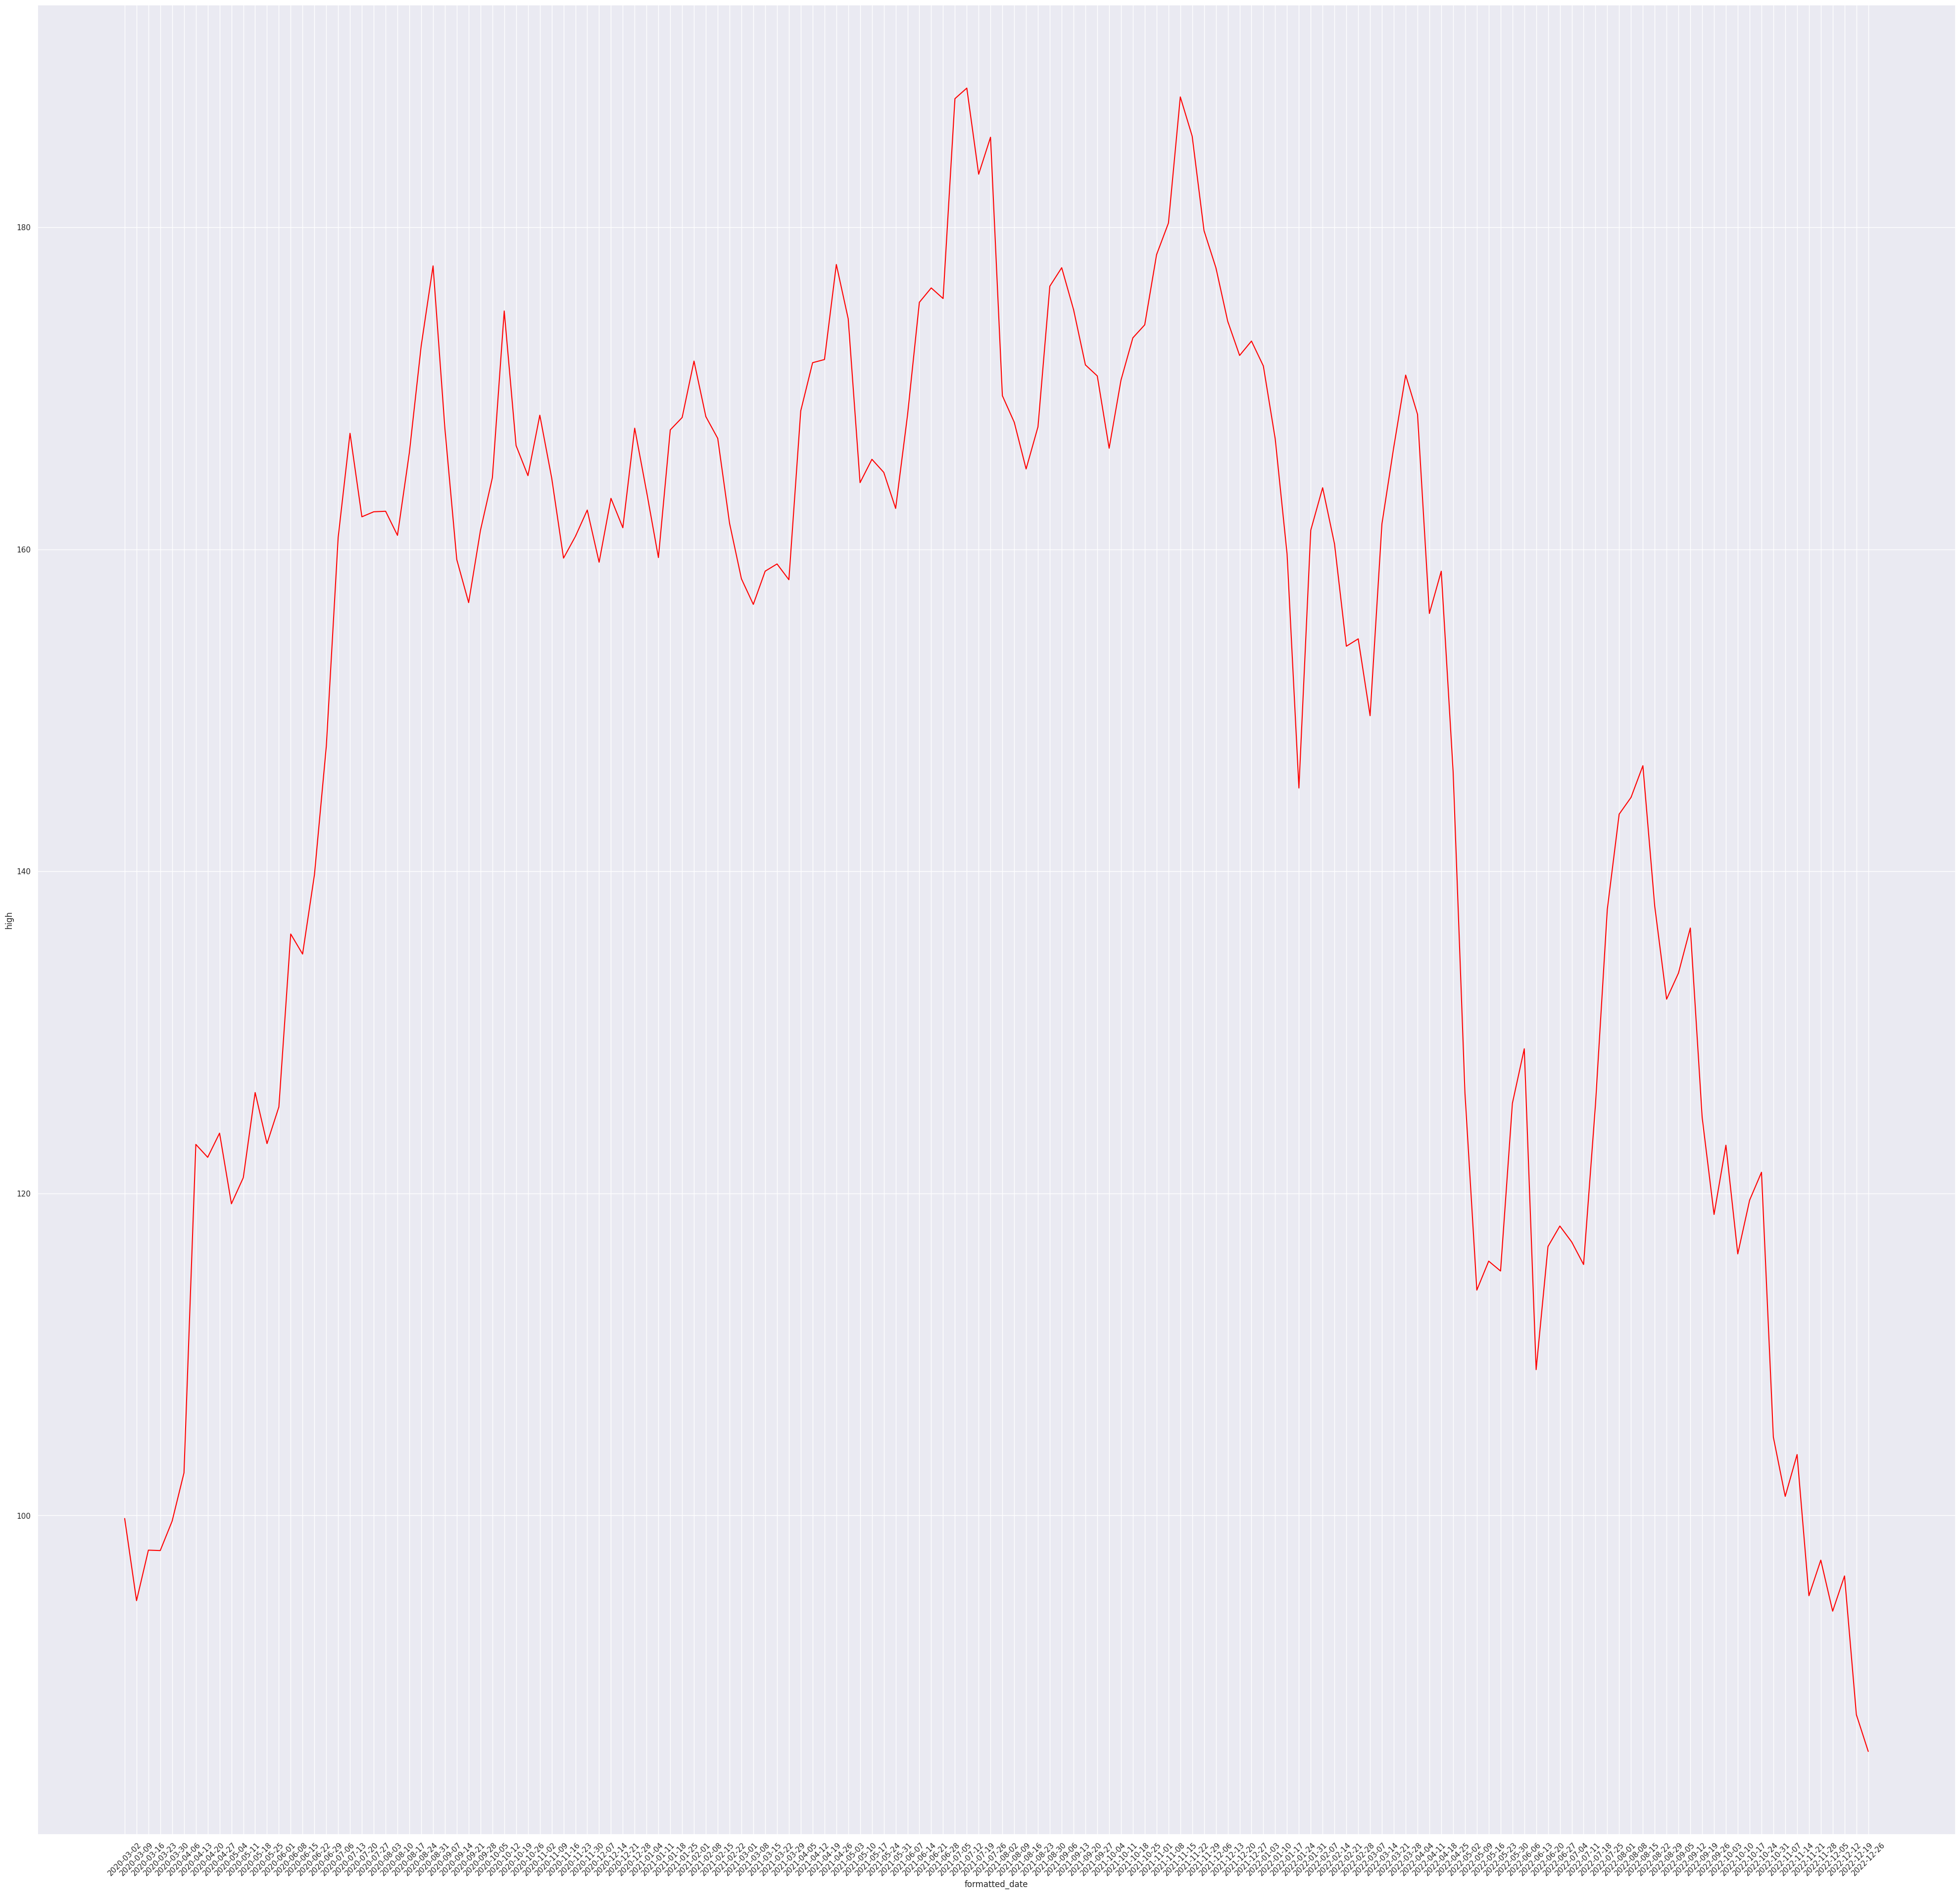

In [ ]:
plt.figure(figsize=(50,48))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.lineplot(data=AMZN, x='formatted_date', y='high', color='red')

*Aqui vai mais um ponto para nossa argumentação:
Observando os gráficos acima vemos o mesmo comportamento apresentado quando vimos o hitórico da NASDAQ.*

In [ ]:
yahoo_financials = YahooFinancials('UBER')
data = yahoo_financials.get_historical_price_data(
    start_date='2020-03-01', end_date='2023-01-01', time_interval='weekly')

In [ ]:
UBER = pd.DataFrame(data['UBER']['prices'])
UBER = UBER.drop('date', axis=1).set_index('formatted_date')

***Vamos olhar agora o histórico da Uber, empresa de serviço de transporte.***

In [ ]:
UBER.head(148)

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2020-03-02,35.340000,30.450001,34.049999,31.680000,194156200,31.680000
2020-03-09,30.320000,21.129999,28.500000,22.600000,224701700,22.600000
2020-03-16,23.889999,13.710000,20.150000,21.330000,355722500,21.330000
2020-03-23,28.450001,19.730000,21.070000,27.280001,240394600,27.280001
2020-03-30,28.389999,21.670000,26.330000,22.820000,195800700,22.820000
...,...,...,...,...,...,...
2022-11-28,29.600000,27.190001,28.110001,28.750000,78351900,28.750000
2022-12-05,28.860001,26.020000,28.410000,26.549999,87616200,26.549999
2022-12-12,28.455000,25.660000,26.420000,25.969999,105608300,25.969999


In [ ]:
UBER.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 2020-03-02 to 2022-12-26
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   high      148 non-null    float64
 1   low       148 non-null    float64
 2   open      148 non-null    float64
 3   close     148 non-null    float64
 4   volume    148 non-null    int64  
 5   adjclose  148 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 12.2+ KB


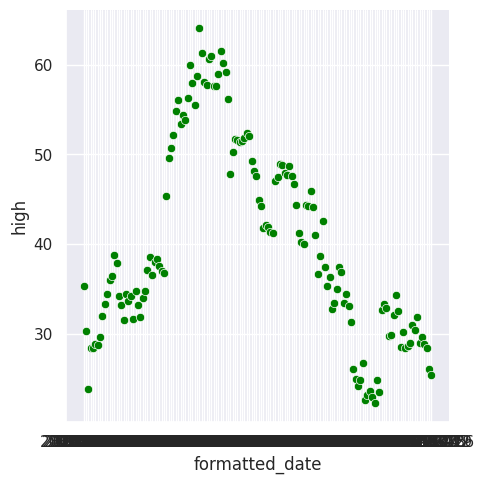

In [ ]:
sns.relplot(data=UBER, x='formatted_date', y="high", color='green')

<Axes: xlabel='formatted_date', ylabel='high'>

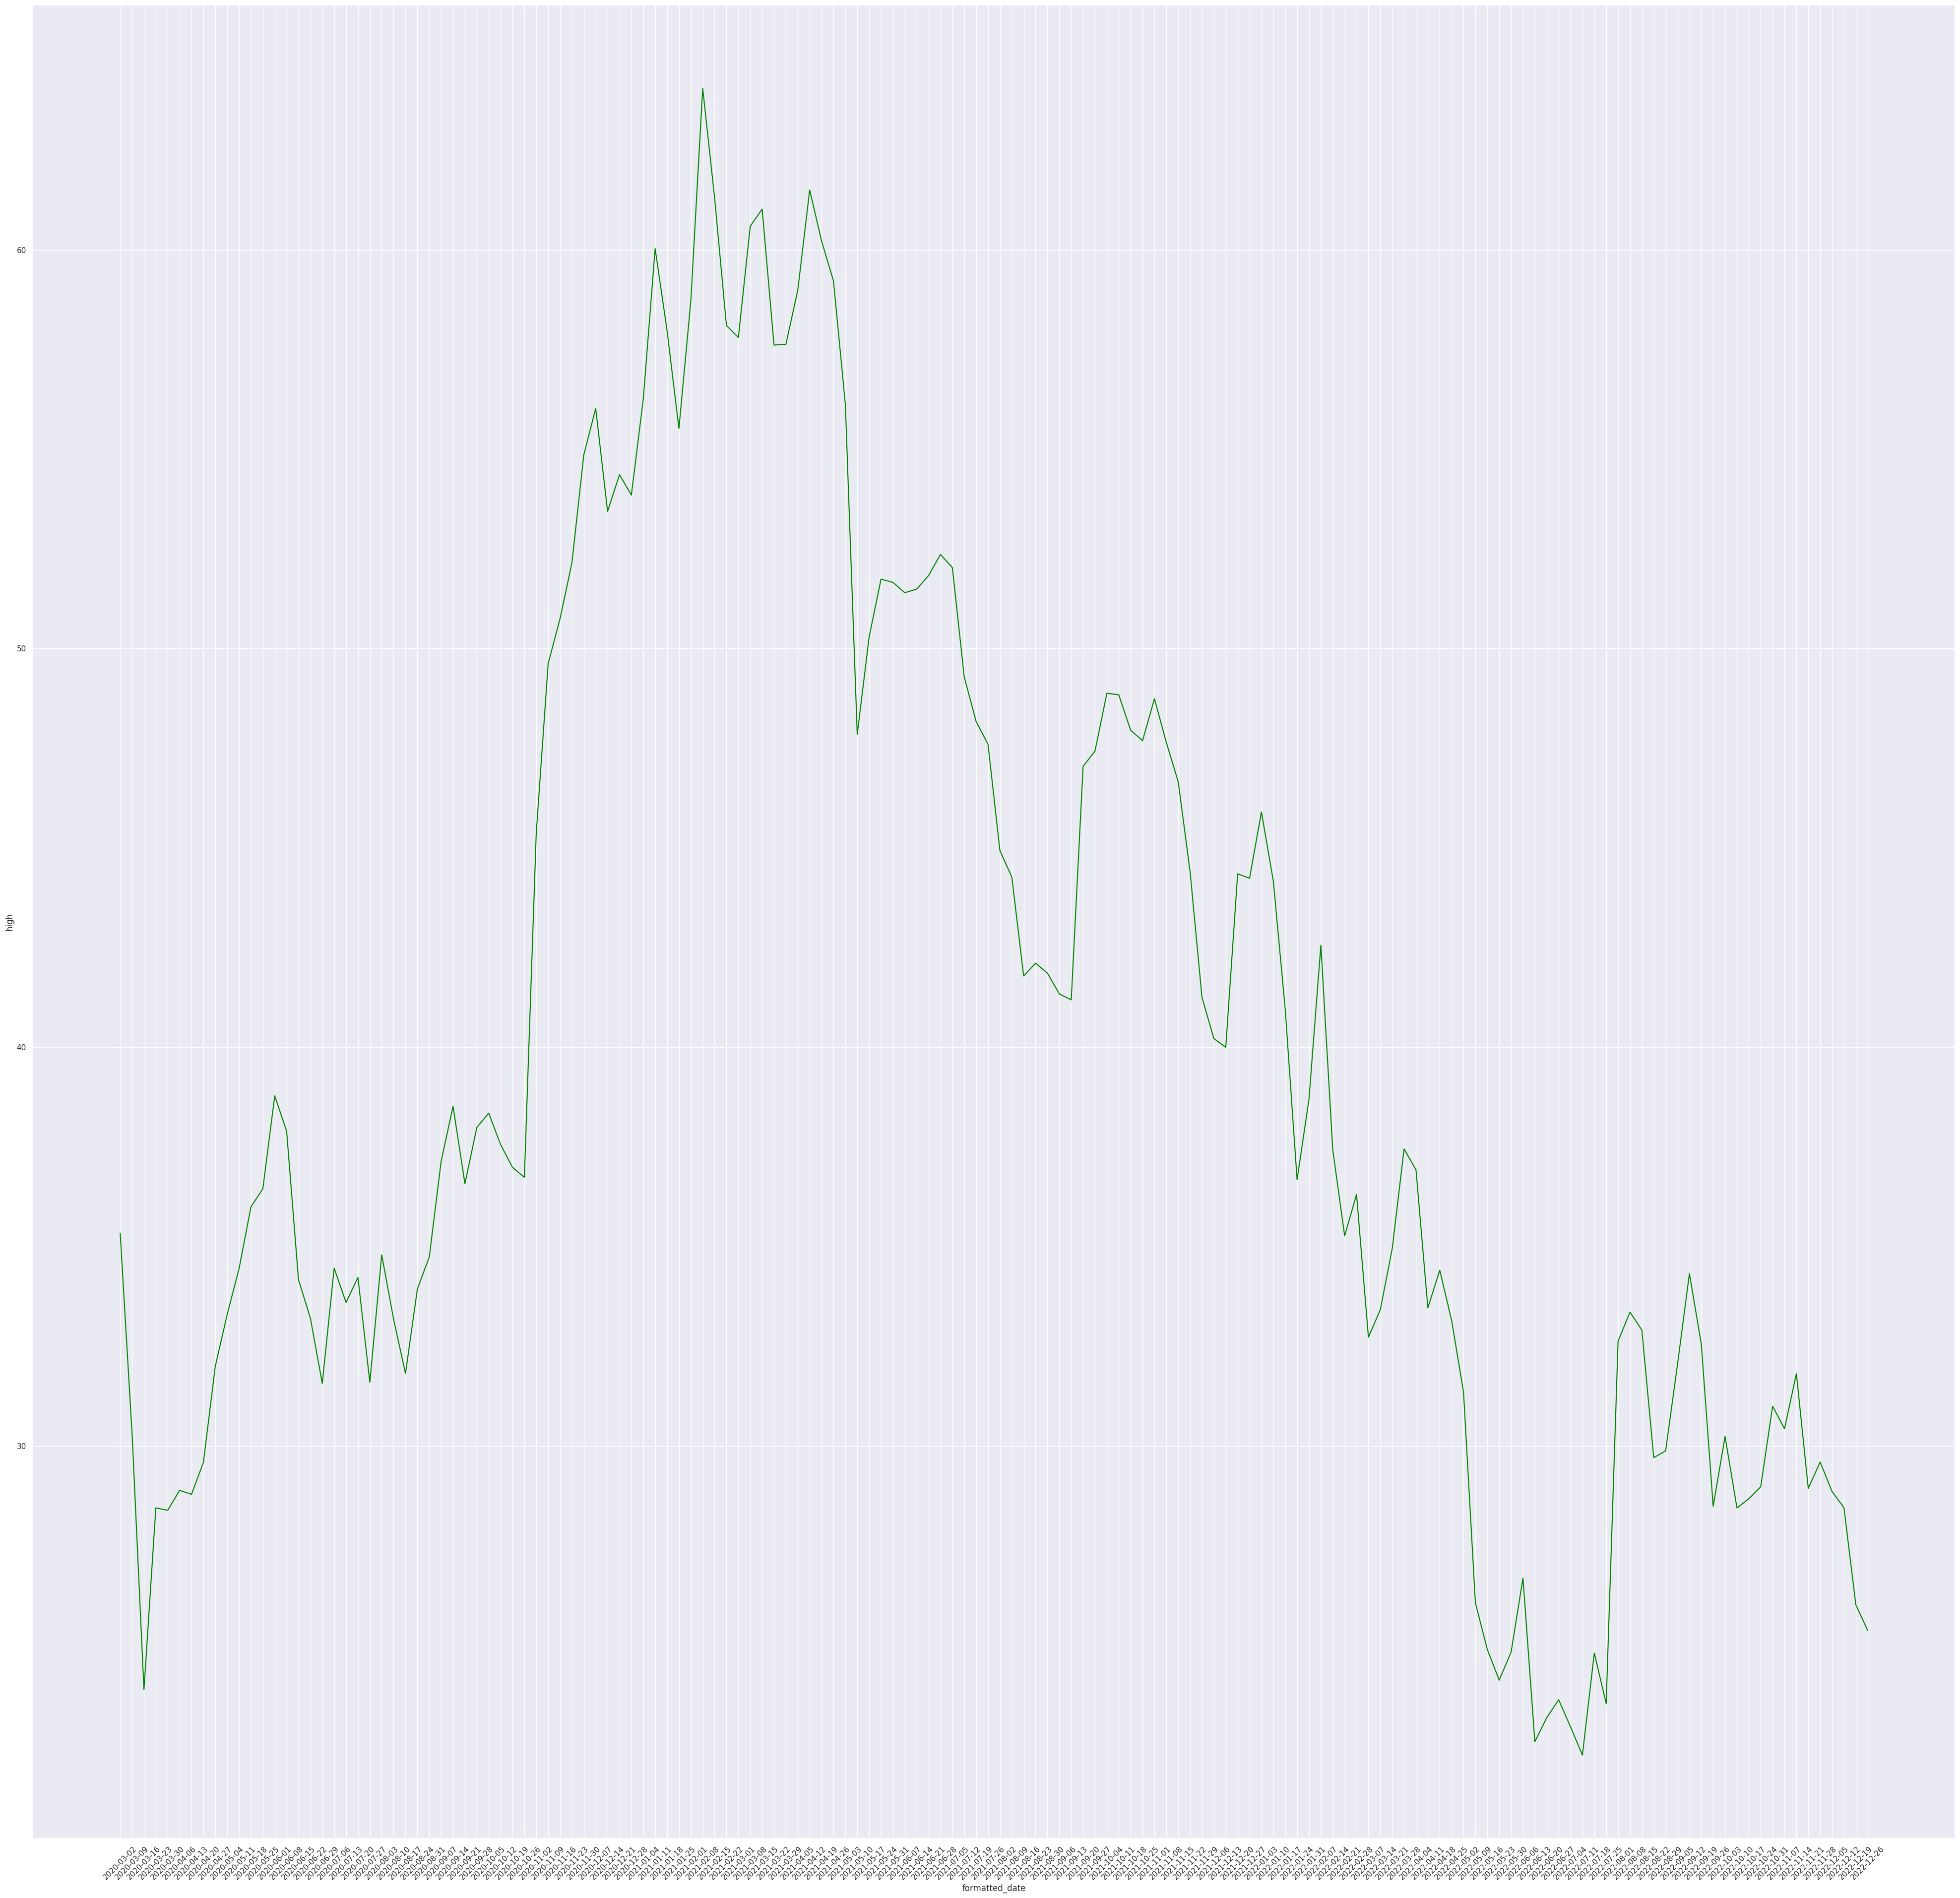

In [ ]:
plt.figure(figsize=(50,48))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.lineplot(data=UBER, x='formatted_date', y='high', color='green')

*Com uma rápida vizualização e comparação vemos o mesmo comportamento dos históricos das empresas/índices anteriores.*

***Vamos ver o histórico da Netflix, um dos maiores streamings do mundo.***

In [ ]:
yahoo_financials = YahooFinancials('NFLX')
data = yahoo_financials.get_historical_price_data(
    start_date='2020-03-01', end_date='2023-01-01', time_interval='weekly')

In [ ]:
NFLX = pd.DataFrame(data['NFLX']['prices'])
NFLX = NFLX.drop('date', axis=1).set_index('formatted_date')

In [ ]:
NFLX.head(148)

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2020-03-02,393.519989,356.850006,373.109985,368.970001,37744000,368.970001
2020-03-09,364.540009,307.320007,343.859985,336.299988,42575700,336.299988
2020-03-16,350.489990,290.250000,306.630005,332.829987,54637200,332.829987
2020-03-23,372.929993,339.170013,347.890015,357.119995,49033700,357.119995
2020-03-30,383.010010,357.510010,363.000000,361.760010,34114300,361.760010
...,...,...,...,...,...,...
2022-11-28,321.989990,275.940002,284.000000,320.410004,53915900,320.410004
2022-12-05,329.000000,302.100006,316.459991,320.010010,45009300,320.010010
2022-12-12,332.720001,286.549988,320.000000,290.709991,60252900,290.709991


In [ ]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 2020-03-02 to 2022-12-26
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   high      148 non-null    float64
 1   low       148 non-null    float64
 2   open      148 non-null    float64
 3   close     148 non-null    float64
 4   volume    148 non-null    int64  
 5   adjclose  148 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 12.2+ KB


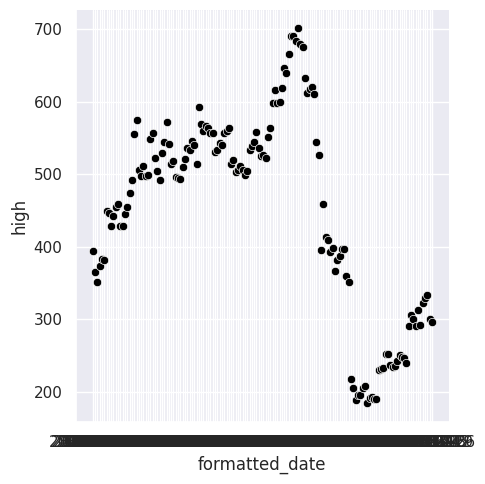

In [ ]:
sns.relplot(data=NFLX, x='formatted_date', y="high", color='black')

<Axes: xlabel='formatted_date', ylabel='high'>

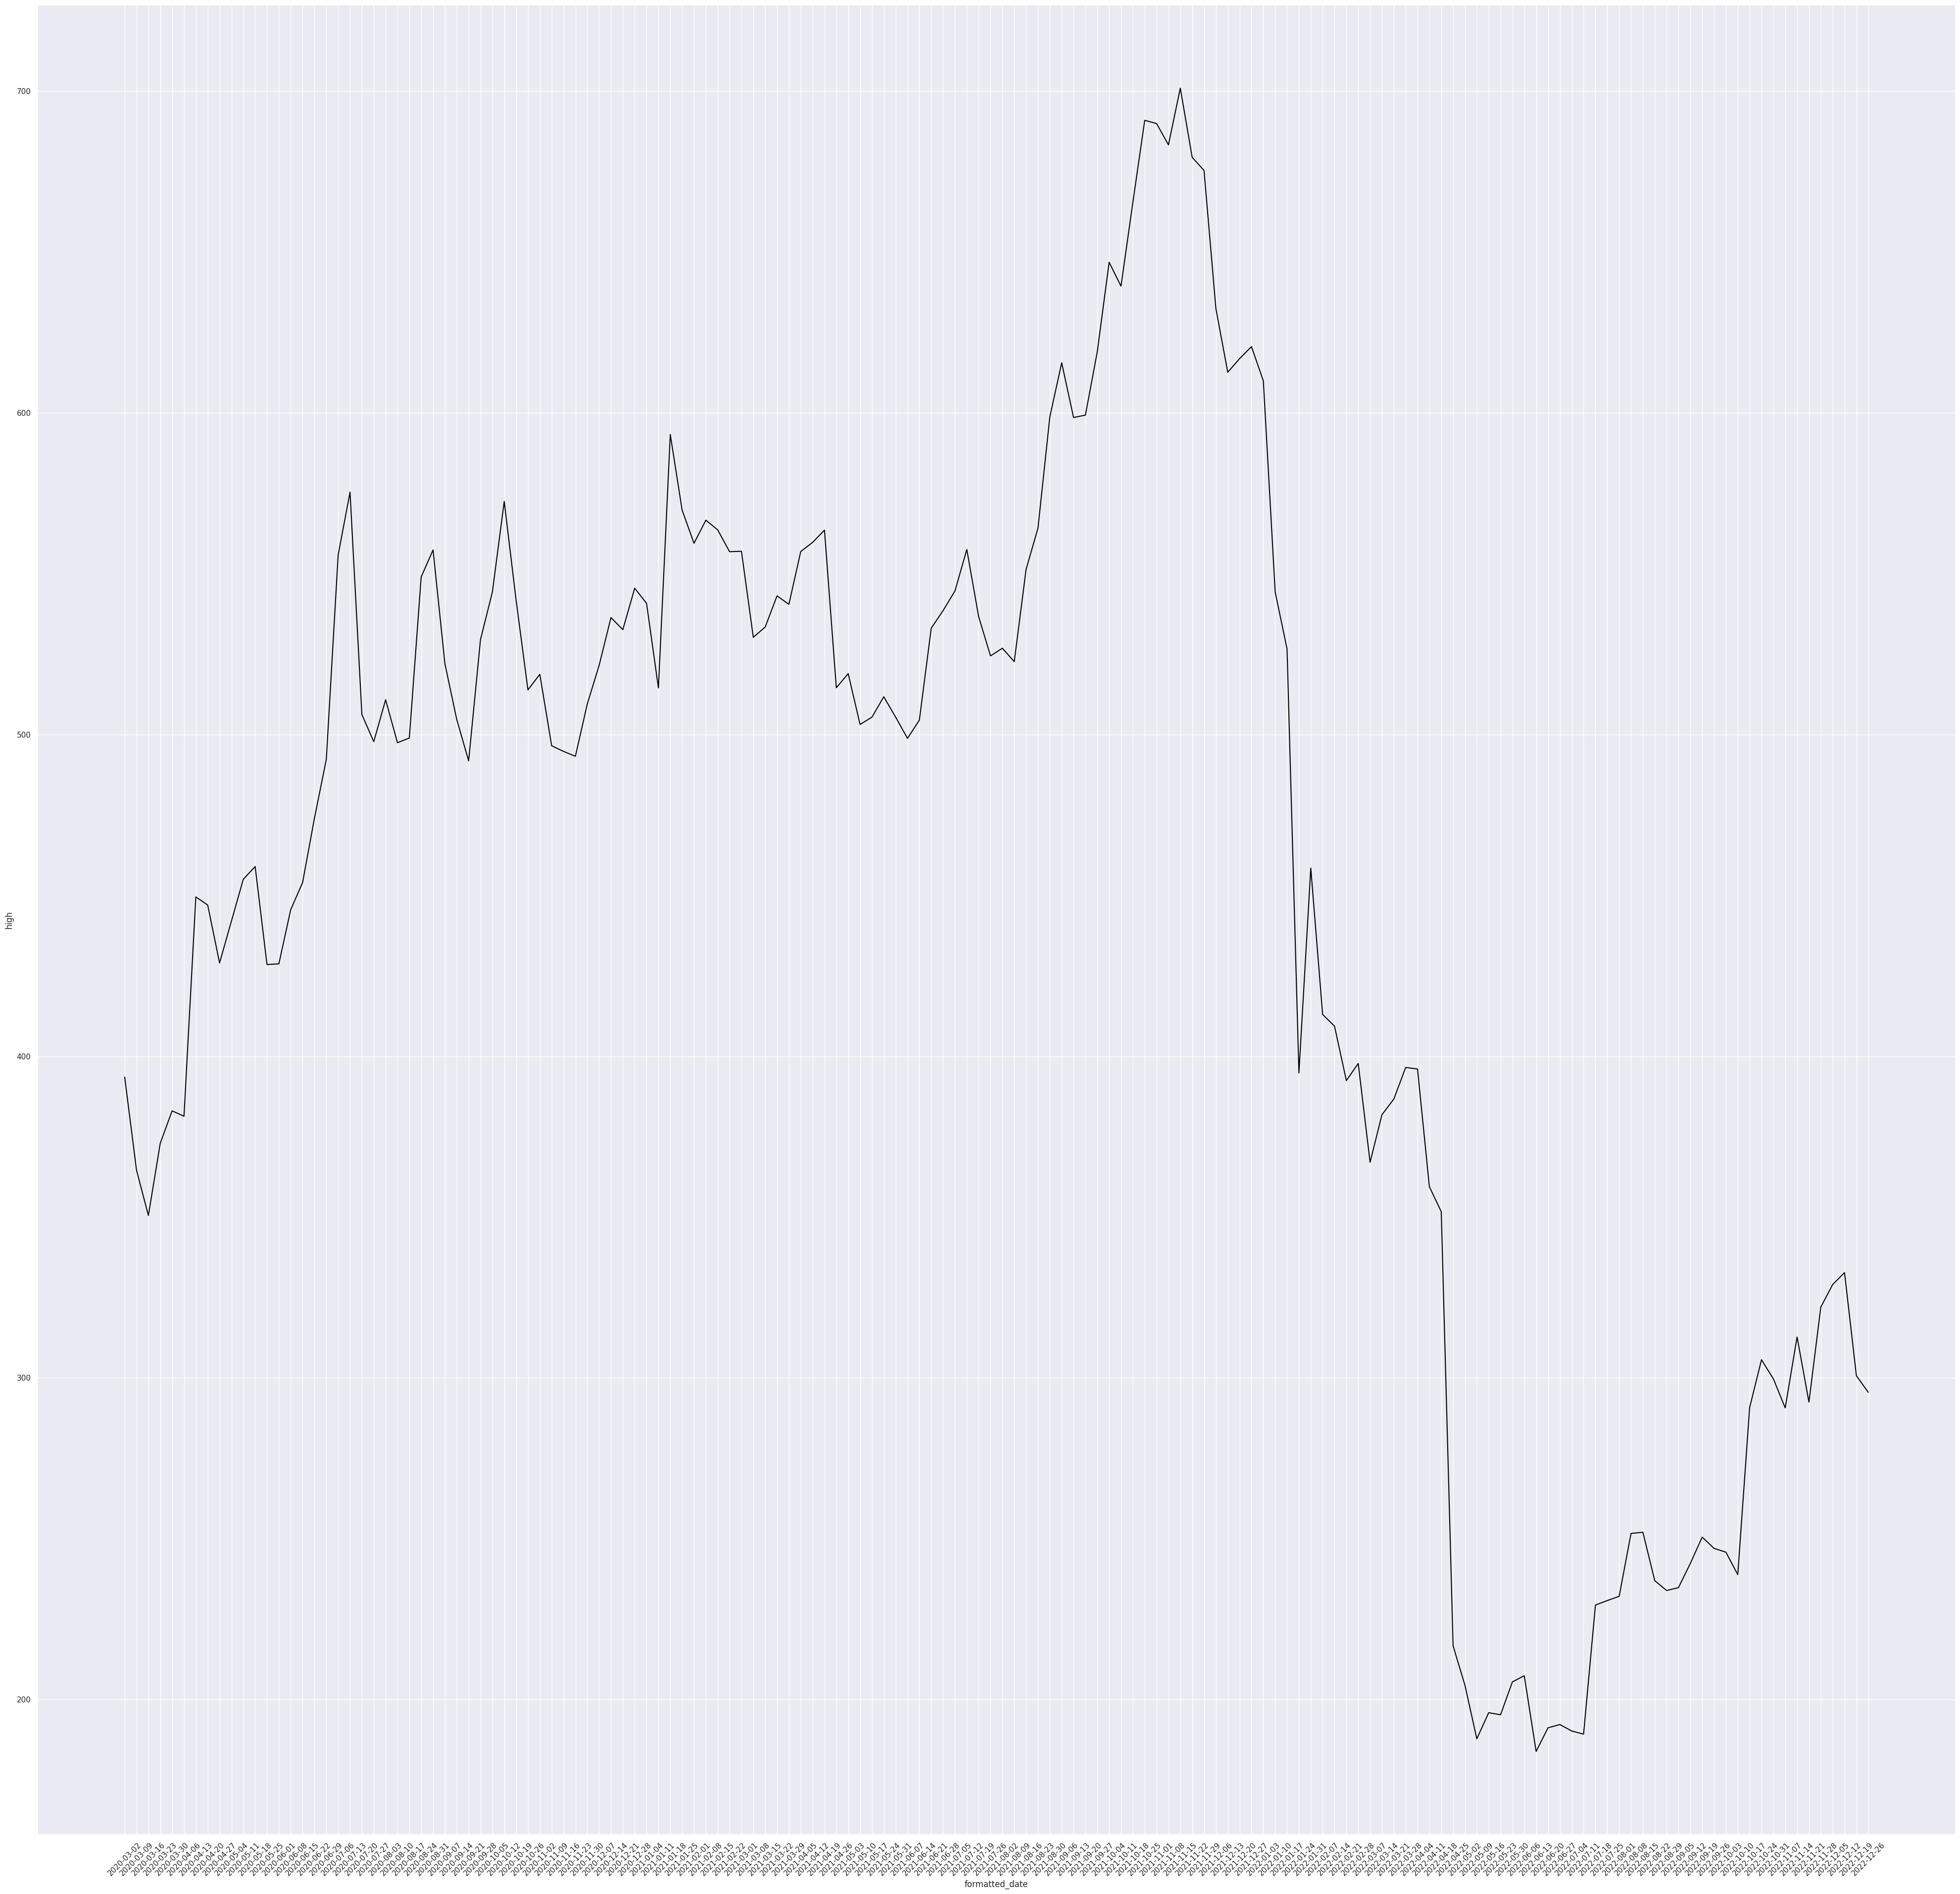

In [ ]:
plt.figure(figsize=(50,48))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.lineplot(data=NFLX, x='formatted_date', y='high', color='black')

*Mais um caso que reforça nosso argumento.*

***Agora vamos olhar o histórico de ações da Meta que dispensa apresentações.***

In [ ]:
yahoo_financials = YahooFinancials('META')
data = yahoo_financials.get_historical_price_data(
    start_date='2020-03-01', end_date='2023-01-01', time_interval='weekly')

In [ ]:
META = pd.DataFrame(data['META']['prices'])
META = META.drop('date', axis=1).set_index('formatted_date')

In [ ]:
META.head(148)

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2020-03-02,197.240005,176.259995,194.029999,181.089996,119888600,181.089996
2020-03-09,178.289993,154.339996,169.600006,170.279999,153135600,170.279999
2020-03-16,159.929993,137.100006,152.320007,149.729996,183359800,149.729996
2020-03-23,164.000000,142.250000,149.660004,156.789993,146892200,156.789993
2020-03-30,170.929993,150.830002,159.179993,154.179993,112568700,154.179993
...,...,...,...,...,...,...
2022-11-28,124.040001,108.379997,110.779999,123.489998,167059100,123.489998
2022-12-05,124.669998,112.879997,121.750000,115.900002,165278000,115.900002
2022-12-12,124.139999,113.139999,115.180000,119.430000,207965200,119.430000


In [ ]:
META.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 2020-03-02 to 2022-12-26
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   high      148 non-null    float64
 1   low       148 non-null    float64
 2   open      148 non-null    float64
 3   close     148 non-null    float64
 4   volume    148 non-null    int64  
 5   adjclose  148 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 12.2+ KB


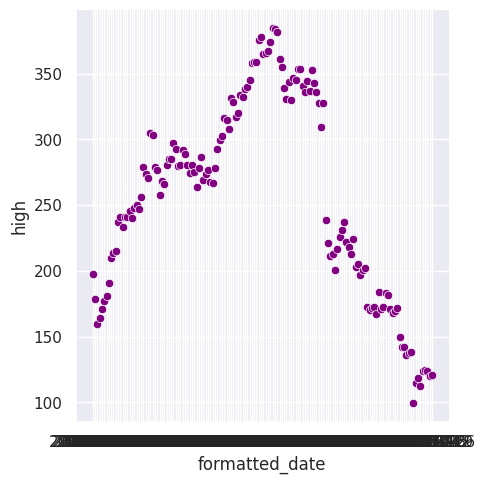

In [ ]:
sns.relplot(data=META, x='formatted_date', y="high", color='purple')

<Axes: xlabel='formatted_date', ylabel='high'>

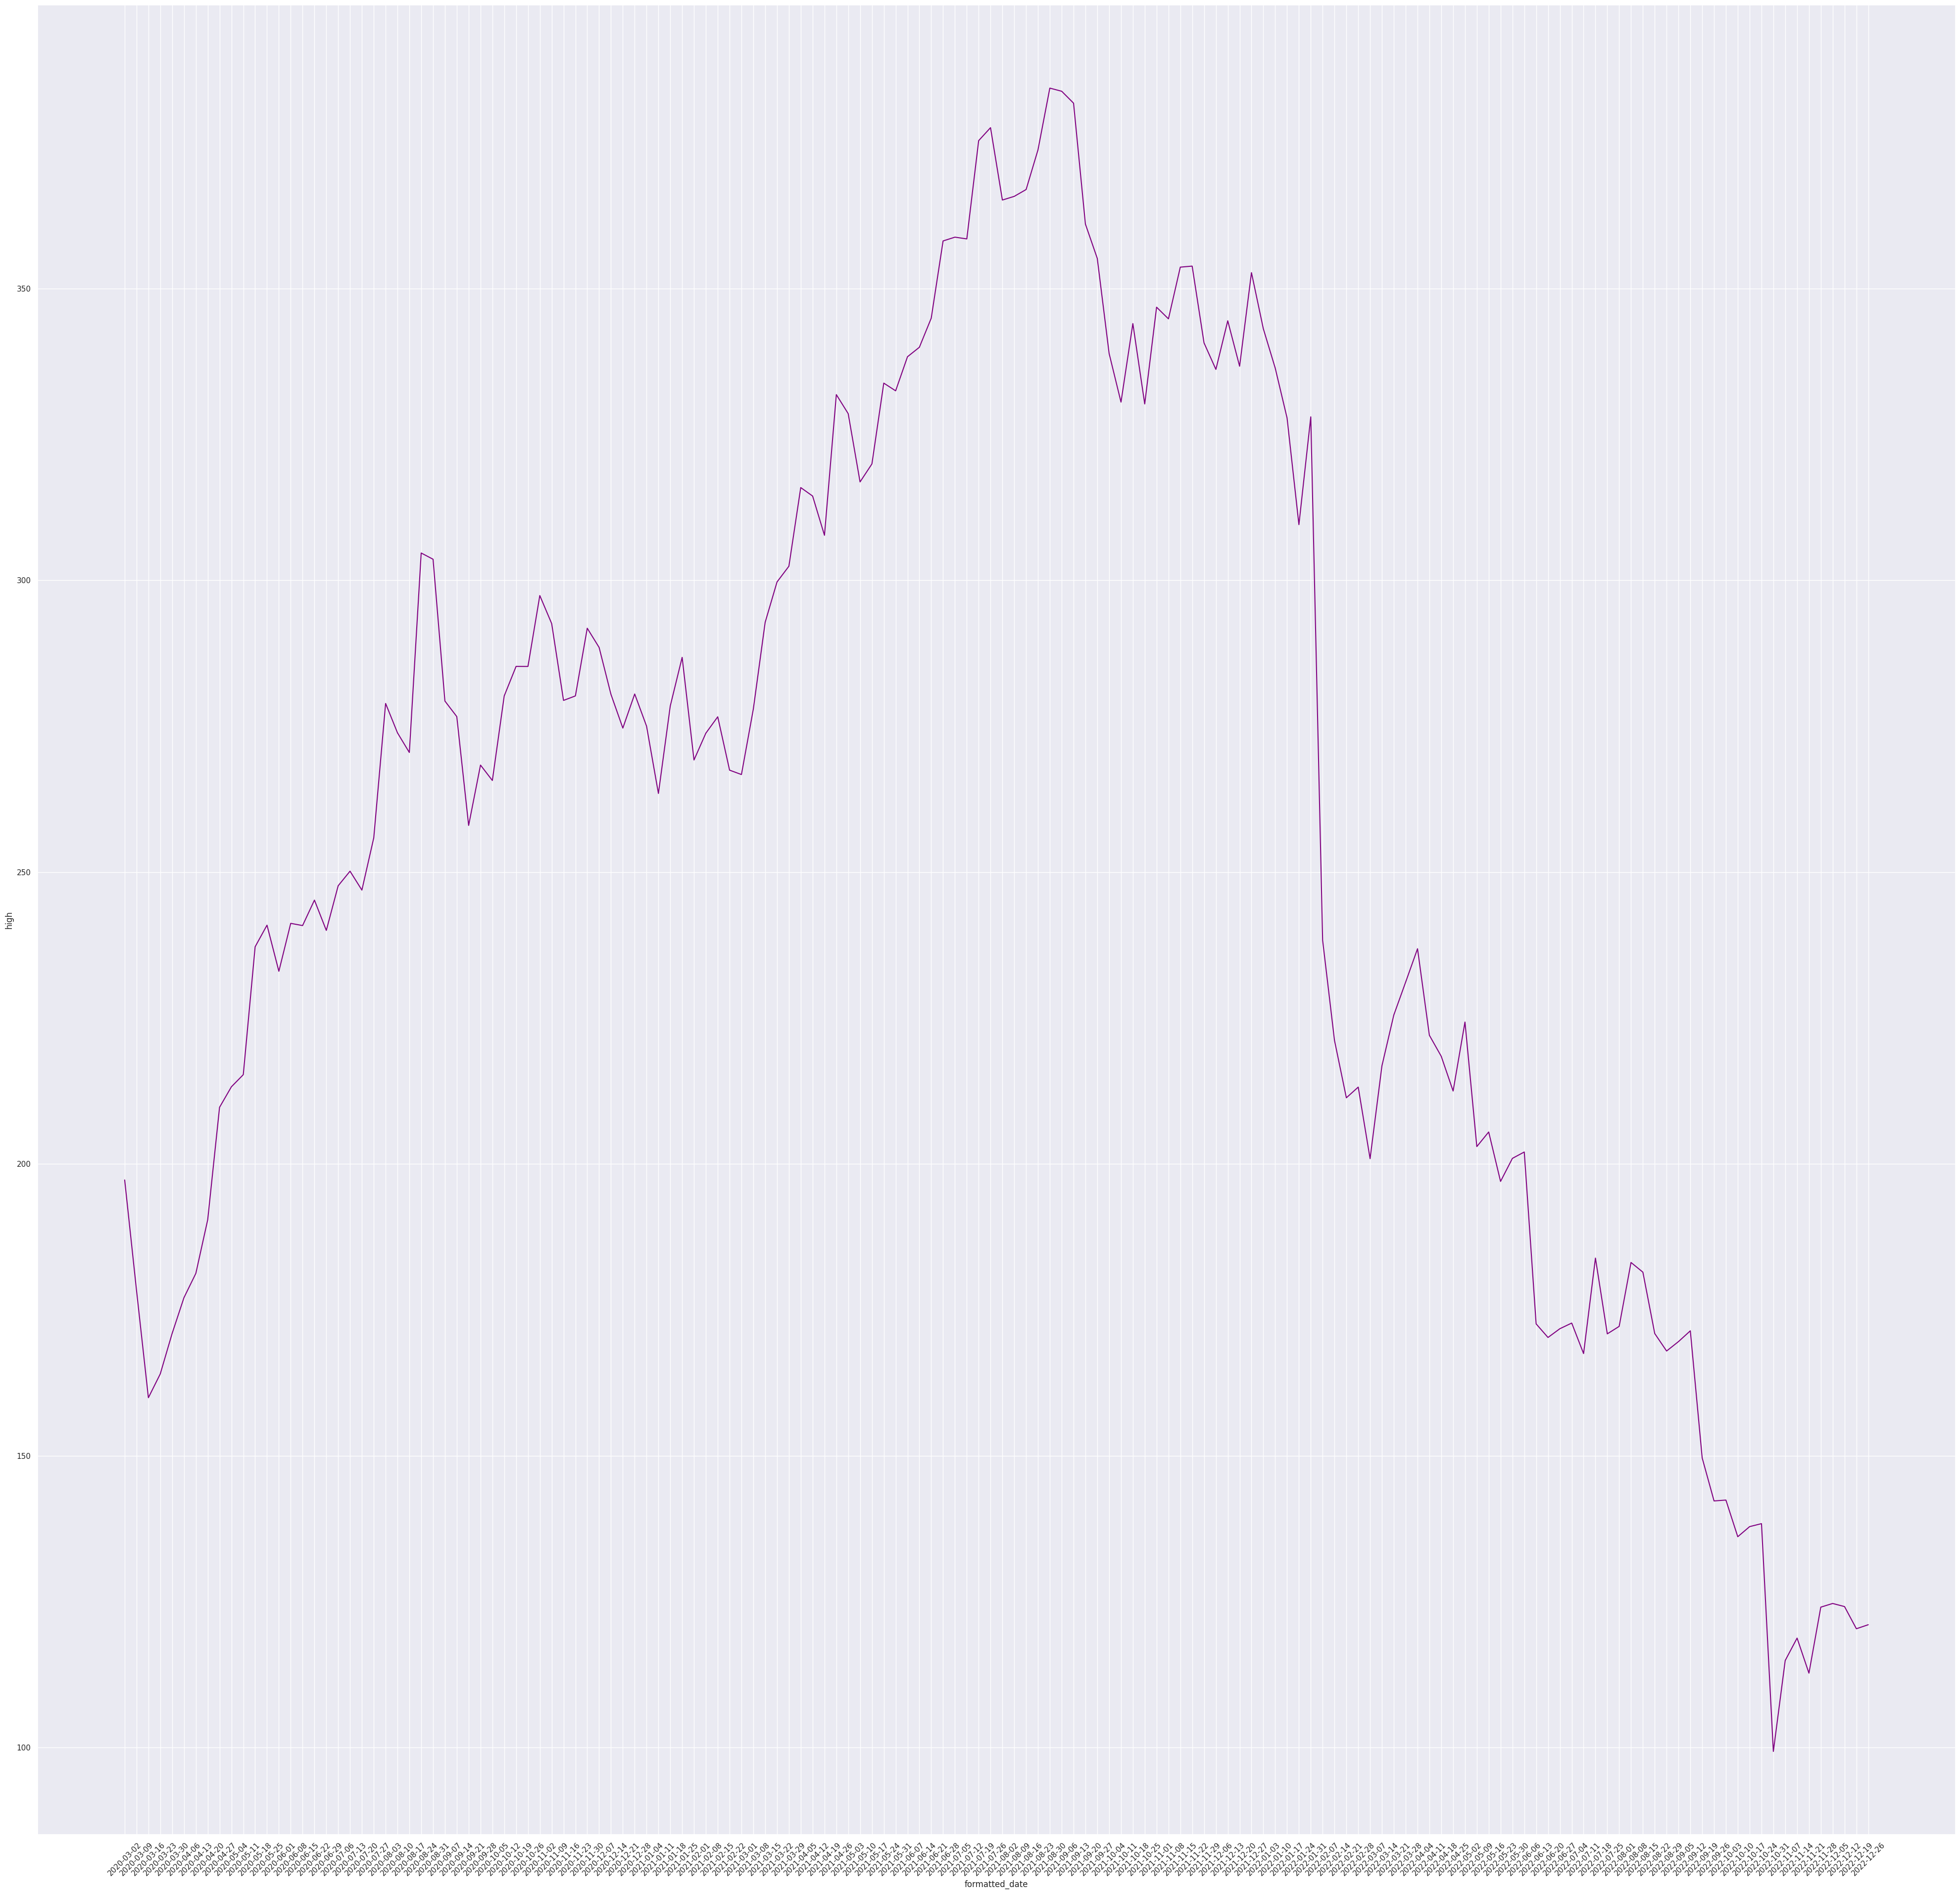

In [ ]:
plt.figure(figsize=(50,48))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.lineplot(data=META, x='formatted_date', y='high', color='purple')

Analisando 1 índice que contempla as 100 maiores empresas não financeiras do mundo e 4 empresas gigantes detalhadamente, comparando uma a uma, podemos ter certeza que não foi um comportamento isolado mas sim geral.   

# **Tirando médias**

***Agora, iremos ver qual foi o tamanho do prejuízo das empresas aqui analisadas em porcentagem, para termos uma média de crescimento e queda no decorrer do período analisado. Levando em consideração o início das datas, o pico de valor das cotações e o valor no fim do período***

In [ ]:
Cotacoes_Selecionadas =  [['Amazon', 99, 185, 85],
            ['Uber', 35, 60, 25],
            ['Netflix', 393, 690, 295],
            ['Meta', 197, 378, 121]]

In [ ]:
CS = pd.DataFrame(Cotacoes_Selecionadas, columns=['Empresa', 'Início', 'Pico de valor', 'Final'])

In [ ]:
CS.head()

,Empresa,Início,Pico de valor,Final
0,Amazon,99,185,85
1,Uber,35,60,25
2,Netflix,393,690,295
3,Meta,197,378,121


In [ ]:
New_CS = [['Amazon', 186, 45],
          ['Uber', 171, 41],
          ['Netflix', 175, 42],
          ['Meta', 191, 32]]

In [ ]:
NCS = pd.DataFrame(New_CS, columns=['Empresa', 'Aumento em %', 'Queda em %'])

In [ ]:
NCS.head()

,Empresa,Aumento em %,Queda em %
0,Amazon,186,45
1,Uber,171,41
2,Netflix,175,42
3,Meta,191,32


In [ ]:
import statistics

In [ ]:
print("A média de aumento em % é de: ", statistics.fmean(NCS['Aumento em %']))

A média de aumento em % é de:  180.75


***Acima utilizando a biblioteca statistics tiramos a média de aumento dos valores das ações das empresas no início do período até o pico de preço das ações. Vemos que é um número exorbitante***

In [ ]:
print("A média de queda em % é de: ", statistics.fmean(NCS['Queda em %']))

A média de queda em % é de:  40.0


***Após o período de pandemia vemos uma queda gigantesca como média nas empresas analisadas.***

# **Conclusão**

Com os dados e gráficos apresentados podemos tirar várias conclusões. Mas nosso intuíto aqui é mostrar o quanto o mercado é mais oportunidade e oportunismo do que uma fórmula mágica para ganhar dinheiro. Na maior crise do nosso século, tivemos um "boom" nas ações de diversas empresas, e quem tinha como e conseguiu aproveitar para comprar antes de subir e vendeu antes de começar a despencar realmente ganhou muito dinheiro. Isso passa longe de significar que investir nas empresas de tecnologia é tiro certo, muito pelo contrário, mostramos que recentemente as empresas tomaram mais prejuízos do que lucros.
E só é possível se previnir quando se conhece o terreno, aqui a análise foi feita para mostrar que é um risco investir, mas pode-se aprender sobre e se previnir para fazer as decisões certas.
Nosso projeto é educativo, e tem o intuíto de ensinar quem quer aprender sobre esse assunto.